In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration and visualization

In [3]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

### Average numbers for all columns

In [5]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**


<Axes: xlabel='salary'>

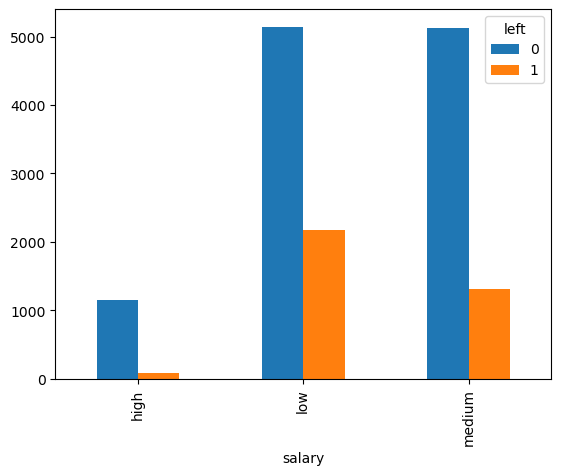

In [6]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

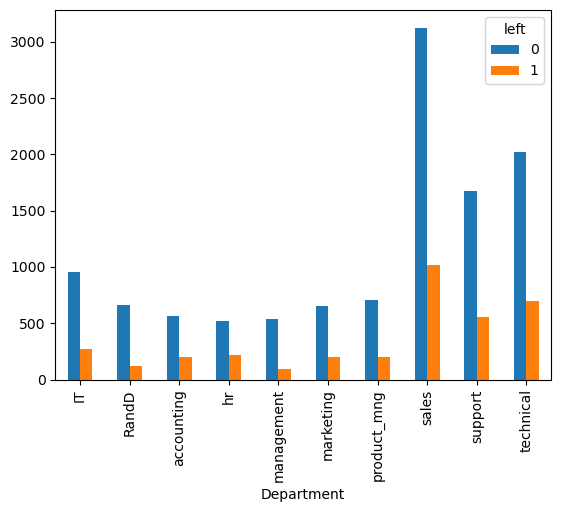

In [7]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis



**From the data analysis so far we can conclude that we will use following variables as independant variables in our model**

1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary


In [8]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [10]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [11]:
df_with_dummies.drop('salary', axis='columns', inplace=True)

In [12]:
X = df_with_dummies
y = df.left

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [15]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
model.score(X_test, y_test)

0.7675555555555555

## Plotting logistic regression curve for satisfaction level

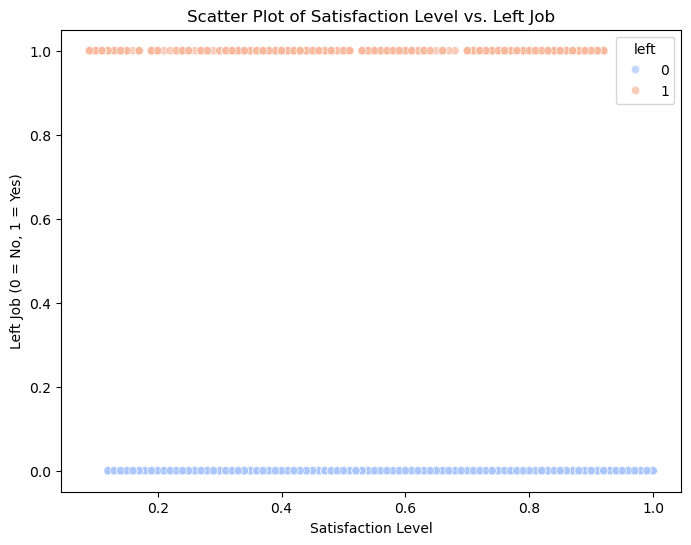

In [17]:

# Scatter plot for satisfaction vs. left (binary)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='left', data=df, hue='left', palette='coolwarm', alpha=0.7)

plt.title('Scatter Plot of Satisfaction Level vs. Left Job')
plt.xlabel('Satisfaction Level')
plt.ylabel('Left Job (0 = No, 1 = Yes)')
plt.show()

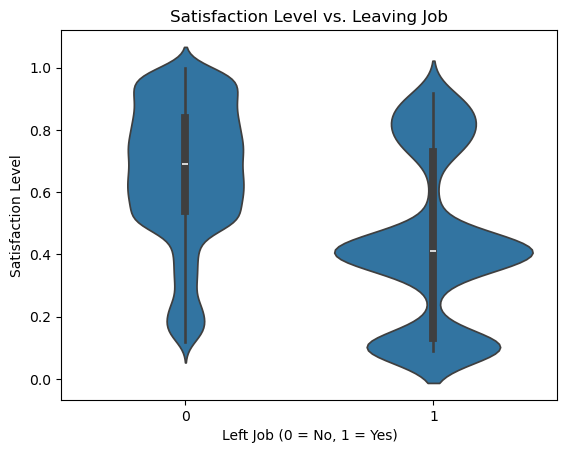

In [18]:
# Violin plot to show distribution of satisfaction level for those who left vs. stayed
sns.violinplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs. Leaving Job')
plt.xlabel('Left Job (0 = No, 1 = Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

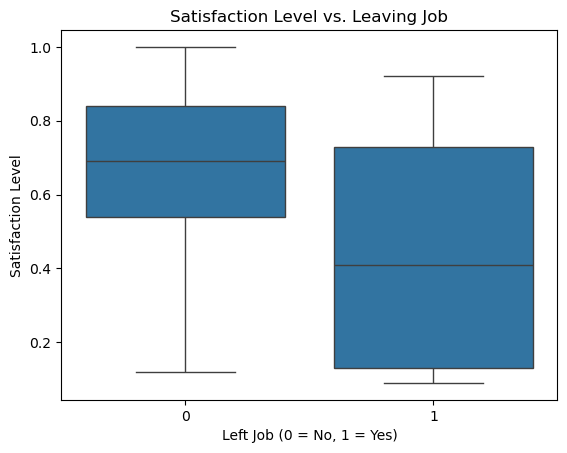

In [19]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs. Leaving Job')
plt.xlabel('Left Job (0 = No, 1 = Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

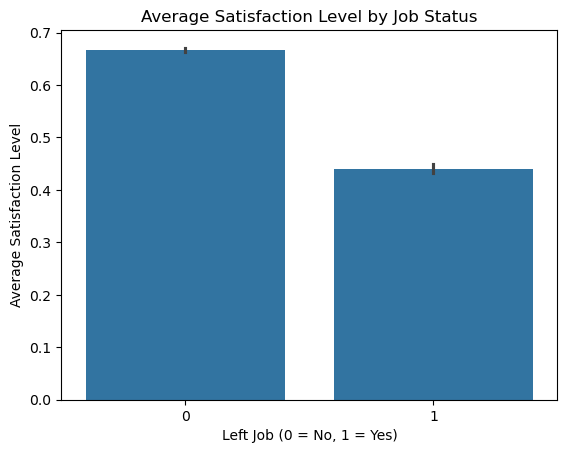

In [20]:
sns.barplot(x='left', y='satisfaction_level', data=df)
plt.title('Average Satisfaction Level by Job Status')
plt.xlabel('Left Job (0 = No, 1 = Yes)')
plt.ylabel('Average Satisfaction Level')
plt.show()

In [21]:
X = df_with_dummies[['satisfaction_level']]
y = df['left']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [23]:
# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Predict probabilities on the test set
X_test_sorted = np.sort(X_test, axis=0)  # Sorting for a smoother curve
y_prob = model.predict_proba(X_test_sorted)[:, 1]  # Get probability of class 1 (left = 1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


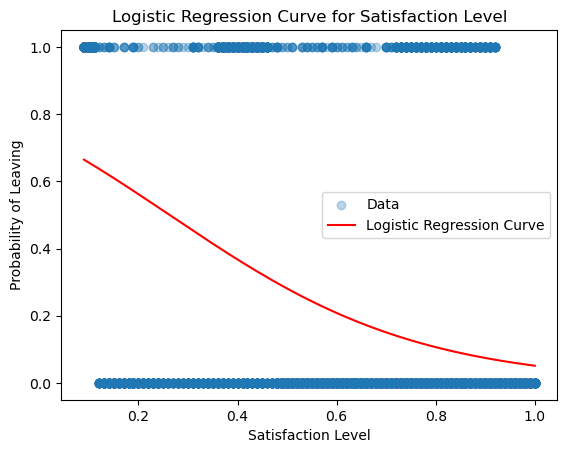

In [25]:
plt.scatter(X_test, y_test, label="Data", alpha=0.3)  # Plot the actual data
plt.plot(X_test_sorted, y_prob, color="red", label="Logistic Regression Curve")  # Plot the sigmoid curve
plt.xlabel('Satisfaction Level')
plt.ylabel('Probability of Leaving')
plt.title('Logistic Regression Curve for Satisfaction Level')
plt.legend()
plt.show()

## Plot the sigmoid curve for average monthly hours


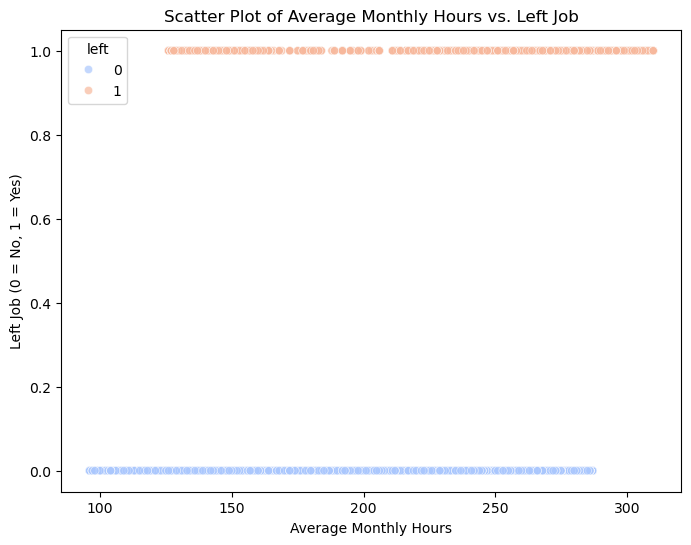

In [26]:

# Scatter plot for average monthly hours vs. left (binary)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_montly_hours', y='left', data=df, hue='left', palette='coolwarm', alpha=0.7)

plt.title('Scatter Plot of Average Monthly Hours vs. Left Job')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Left Job (0 = No, 1 = Yes)')
plt.show()

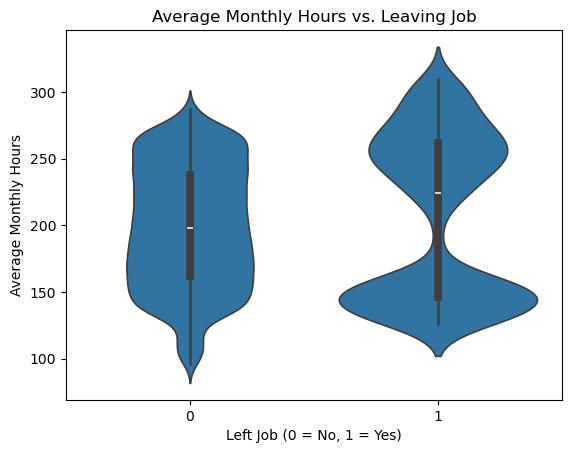

In [27]:
sns.violinplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours vs. Leaving Job')
plt.xlabel('Left Job (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()

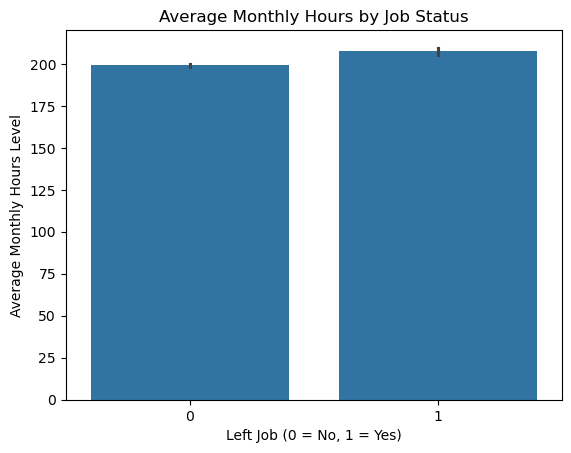

In [30]:
sns.barplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours by Job Status')
plt.xlabel('Left Job (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Hours Level')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


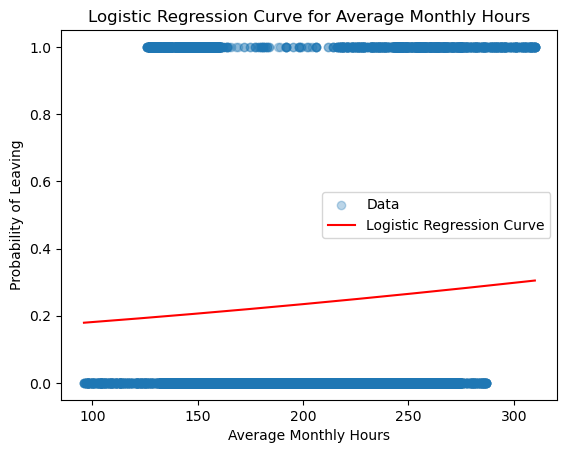

In [28]:
X = df_with_dummies[['average_montly_hours']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

X_test_sorted = np.sort(X_test, axis=0)  # Sorting for a smoother curve
y_prob = model.predict_proba(X_test_sorted)[:, 1]  # Get probability of class 1 (left = 1)

plt.scatter(X_test, y_test, label="Data", alpha=0.3)  # Plot the actual data

plt.plot(X_test_sorted, y_prob, color="red", label="Logistic Regression Curve")  # Plot the sigmoid curve

plt.xlabel('Average Monthly Hours')

plt.ylabel('Probability of Leaving')

plt.title('Logistic Regression Curve for Average Monthly Hours')

plt.legend()

plt.show()

## Ploting the scatter plot for promotion last 5 years


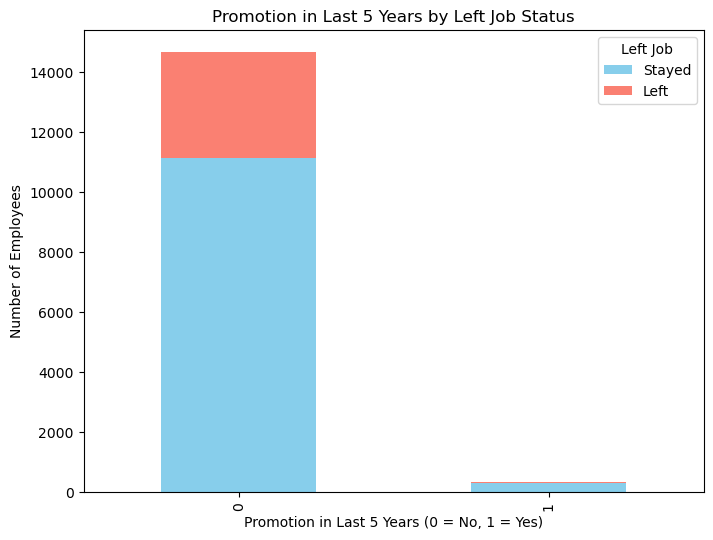

In [31]:
# Create a crosstab for promotion and left
promotion_left = pd.crosstab(df['promotion_last_5years'], df['left'])

# Stacked bar chart
promotion_left.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Promotion in Last 5 Years by Left Job Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'], title='Left Job')
plt.show()

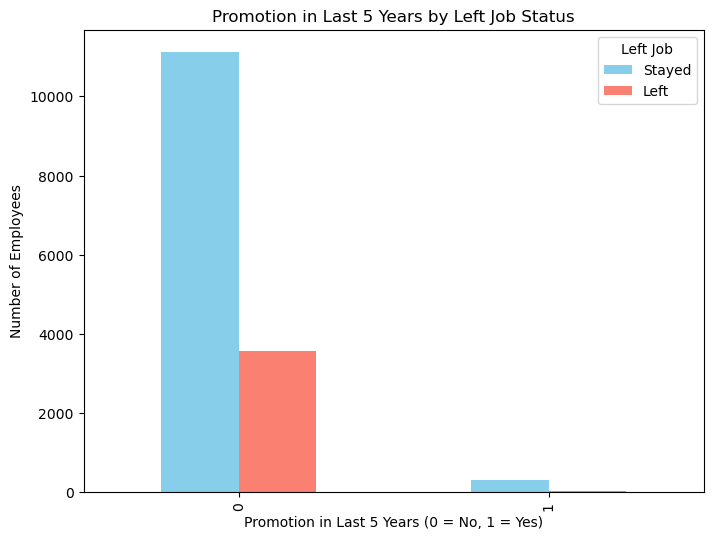

In [33]:
promotion_left.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Promotion in Last 5 Years by Left Job Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'], title='Left Job')
plt.show()

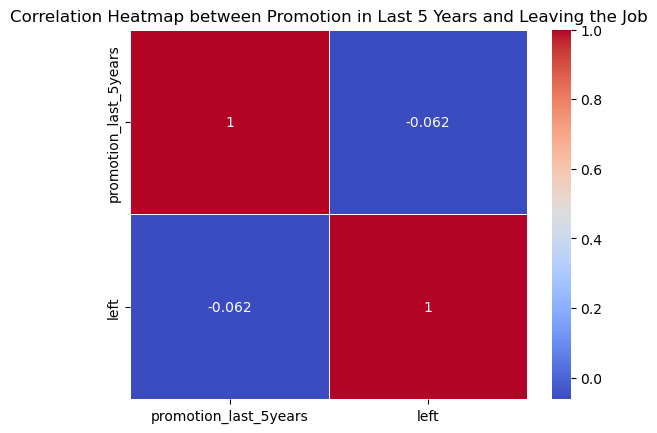

In [32]:
# Create a correlation matrix

corr_matrix = df[['promotion_last_5years', 'left']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Promotion in Last 5 Years and Leaving the Job')
plt.show()

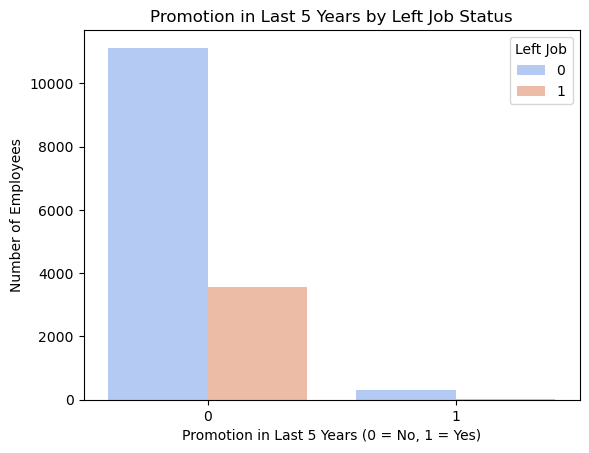

In [34]:
sns.countplot(x='promotion_last_5years', hue='left', data=df, palette='coolwarm')
plt.title('Promotion in Last 5 Years by Left Job Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.legend(title='Left Job')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


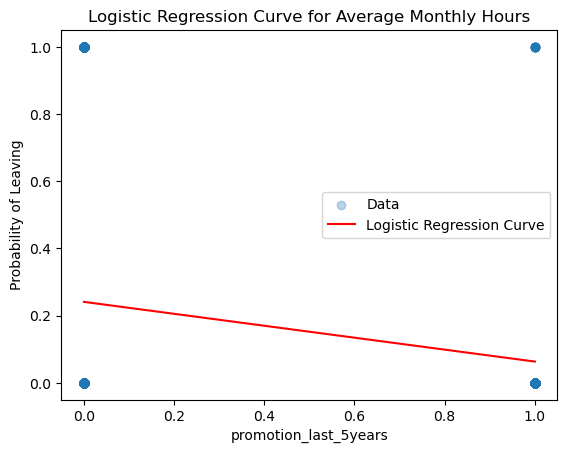

In [29]:
X = df_with_dummies[['promotion_last_5years']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

X_test_sorted = np.sort(X_test, axis=0)  # Sorting for a smoother curve
y_prob = model.predict_proba(X_test_sorted)[:, 1]  # Get probability of class 1 (left = 1)

plt.scatter(X_test, y_test, label="Data", alpha=0.3)  # Plot the actual data

plt.plot(X_test_sorted, y_prob, color="red", label="Logistic Regression Curve")  # Plot the sigmoid curve

plt.xlabel('promotion_last_5years')

plt.ylabel('Probability of Leaving')

plt.title('Logistic Regression Curve for Average Monthly Hours')

plt.legend()

plt.show()